<a href="https://colab.research.google.com/github/PurnabrataPanja/PRODIGY_DS_04/blob/main/Twitter_Sentiment_Analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [7]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

**Loading the Dataset**

In [8]:
# Load the dataset
data = pd.read_csv("twitter_training.csv")

**Displaying the Dataset**

In [9]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


**Data Preprocessing**

In [10]:
# Remove rows with missing values in the text column
data = data.dropna(subset=['im getting on borderlands and i will murder you all ,'])

**Initializing Sentiment Analyzer**

In [11]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

**Sentiment Analysis**

In [12]:
# Apply sentiment analysis to each tweet
# The sentiment score is computed using the compound score from the VADER sentiment analyzer
data['sentiment_score'] = data['im getting on borderlands and i will murder you all ,'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

**Data Visualization - Sentiment Distribution**

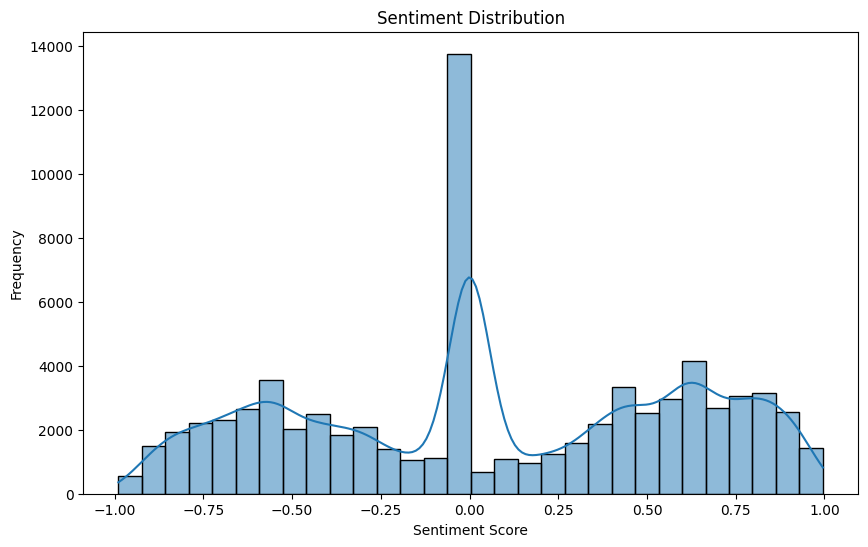

In [13]:
# Data visualization
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=30, kde=True)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

**Generating Word Clouds**

In [14]:
# Generate word cloud for positive and negative sentiments
positive_words = ' '.join(data[data['sentiment_score'] > 0]['im getting on borderlands and i will murder you all ,'])
negative_words = ' '.join(data[data['sentiment_score'] < 0]['im getting on borderlands and i will murder you all ,'])


**Visualization - Word Clouds**

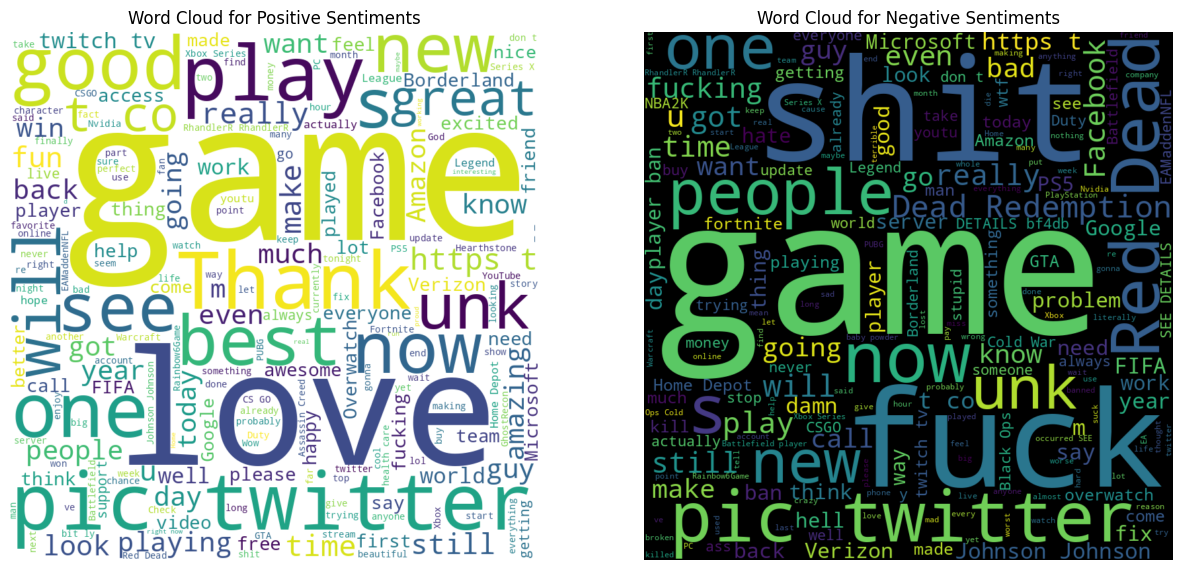

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate(positive_words)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiments')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=800, background_color='black').generate(negative_words)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiments')
plt.axis('off')

plt.show()
